In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv("C:/USers/User/Downloads/titanic.csv")
# C:/USers/GC/ : 파일이 저장된 디렉토리 위치, 각자에 맞게 수정

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data_drop = ['Name','Cabin', 'Ticket', 'Ticket','Fare', 'Age', 'PassengerId']
data = data.drop(data_drop, axis=1)

In [6]:
data.fillna(data.mean())

C:\Users\User\AppData\Local\Temp\ipykernel_16196\3231489778.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean())


,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,1,0,S
1,1,1,female,1,0,C
2,1,3,female,0,0,S
3,1,1,female,1,0,S
4,0,3,male,0,0,S
...,...,...,...,...,...,...
886,0,2,male,0,0,S
887,1,1,female,0,0,S
888,0,3,female,1,2,S
889,1,1,male,0,0,C


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [8]:
data

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,2,1,1,0,2
1,1,0,0,1,0,0
2,1,2,0,0,0,2
3,1,0,0,1,0,2
4,0,2,1,0,0,2
...,...,...,...,...,...,...
886,0,1,1,0,0,2
887,1,0,0,0,0,2
888,0,2,0,1,2,2
889,1,0,1,0,0,0


In [9]:
#Splitting the data into training and test test
X = data.iloc[:,1:5].values
y = data.iloc[:,5].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [10]:
X

array([[2, 1, 1, 0],
       [0, 0, 1, 0],
       [2, 0, 0, 0],
       ...,
       [2, 0, 1, 2],
       [0, 1, 0, 0],
       [2, 1, 0, 0]], dtype=int64)

In [11]:
X.shape

(891, 4)

In [12]:
Y

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [13]:
Y.shape

(891, 4)

In [14]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(5,input_shape=(4,),activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 4)                 24        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


In [15]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 2s 30ms/step - loss: 2.7179 - accuracy: 0.0112 - val_loss: 2.5377 - val_accuracy: 0.0279
Epoch 2/100
23/23 [==============================] - 0s 10ms/step - loss: 2.4583 - accuracy: 0.0225 - val_loss: 2.3003 - val_accuracy: 0.0670
Epoch 3/100
23/23 [==============================] - 0s 10ms/step - loss: 2.2315 - accuracy: 0.0351 - val_loss: 2.0978 - val_accuracy: 0.0726
Epoch 4/100
23/23 [==============================] - 0s 10ms/step - loss: 2.0349 - accuracy: 0.0435 - val_loss: 1.9169 - val_accuracy: 0.0838
Epoch 5/100
23/23 [==============================] - 0s 9ms/step - loss: 1.8607 - accuracy: 0.0534 - val_loss: 1.7551 - val_accuracy: 0.0670
Epoch 6/100
23/23 [==============================] - 0s 9ms/step - loss: 1.7069 - accuracy: 0.0913 - val_loss: 1.6123 - val_accuracy: 0.1173
Epoch 7/100
23/23 [==============================] - 0s 9ms/step - loss: 1.5709 - accuracy: 0.1433 - val_loss: 1.4907 - val_accuracy: 0.1732
Epoch 8/1

Epoch 59/100
23/23 [==============================] - 0s 9ms/step - loss: 0.7553 - accuracy: 0.7261 - val_loss: 0.7748 - val_accuracy: 0.7095
Epoch 60/100
23/23 [==============================] - 0s 9ms/step - loss: 0.7540 - accuracy: 0.7261 - val_loss: 0.7739 - val_accuracy: 0.7095
Epoch 61/100
23/23 [==============================] - 0s 9ms/step - loss: 0.7529 - accuracy: 0.7261 - val_loss: 0.7732 - val_accuracy: 0.7095
Epoch 62/100
23/23 [==============================] - 0s 9ms/step - loss: 0.7516 - accuracy: 0.7261 - val_loss: 0.7724 - val_accuracy: 0.7095
Epoch 63/100
23/23 [==============================] - 0s 9ms/step - loss: 0.7505 - accuracy: 0.7261 - val_loss: 0.7713 - val_accuracy: 0.7095
Epoch 64/100
23/23 [==============================] - 0s 9ms/step - loss: 0.7492 - accuracy: 0.7261 - val_loss: 0.7701 - val_accuracy: 0.7095
Epoch 65/100
23/23 [==============================] - 0s 9ms/step - loss: 0.7478 - accuracy: 0.7261 - val_loss: 0.7687 - val_accuracy: 0.7095
Epoch 

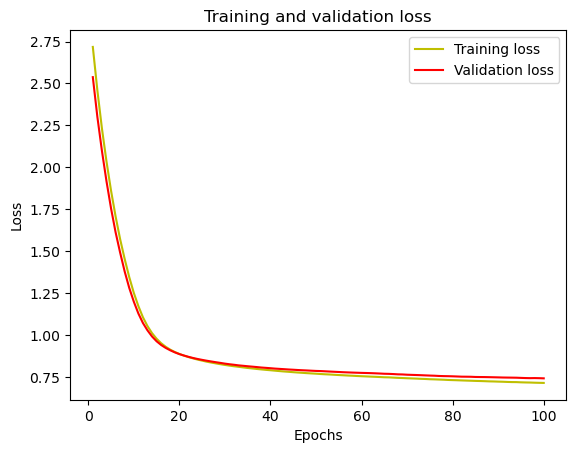

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

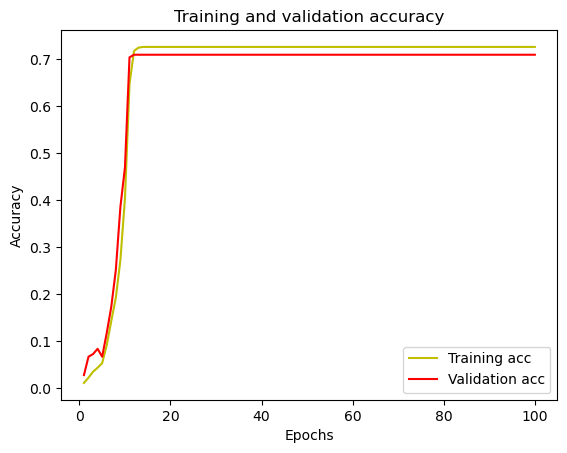

In [17]:
acc = model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.00      0.00      0.00        13
           2       0.71      1.00      0.83       127

    accuracy                           0.71       179
   macro avg       0.24      0.33      0.28       179
weighted avg       0.50      0.71      0.59       179

[[  0   0  39]
 [  0   0  13]
 [  0   0 127]]


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
